# Urban Mobility and Economic Productivity in LATAM Cities
## Project Overview

This project analyzes the relationship between urban mobility and economic productivity in major Latin American cities. 

Using data from the TomTom Traffic Index and OECD Cities dataset, the objective is to explore whether higher congestion levels are associated with lower economic productivity (measured by GDP per capita).

The analysis includes data cleaning, aggregation, merging datasets, exploratory data analysis, and visualization to identify patterns and potential investment priorities.

## 1. Data Loading & Initial Exploration

Before cleaning or merging the datasets, we first explore their structure, data types, and potential inconsistencies. This step ensures data quality and prepares the foundation for further analysis.

### 1.1 Importing and Inspecting the Data

The analysis uses two primary datasets:

- **TomTom Traffic Index** – urban mobility and congestion metrics.
- **OECD Cities Dataset** – economic indicators such as GDP per capita, unemployment rate, pollution, and population.

Both datasets were loaded into pandas DataFrames for further inspection and preprocessing.

Initial exploration included:
- Reviewing column names and data types
- Checking for missing values
- Inspecting sample rows using `.head()`


In [ ]:
import pandas as pd
import numpy as nmp
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load datasets
traffic = pd.read_csv('/datasets/tomtom_traffic.csv')

eco = pd.read_csv('/datasets/oecd_city_economy.csv')

In [ ]:
# Preview traffic dataset
traffic.head(5)

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232
3,ARE,abu-dhabi,2025-01-13 01:46:30.001,8.2,2.0,4.1,2.0,2.0,2025-01-06 01:46:30.000,7.723808,7.899046,-0.175238
4,ARE,abu-dhabi,2025-01-13 00:01:30.000,1.1,1.0,0.2,1.0,1.0,2025-01-06 00:01:30.000,8.336363,8.604379,-0.268016


In [ ]:
# Preview eco dataset
eco.head(5)

,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"
3,2023,brasilia,Brazil,"15.999,00",8.3%,"13,50","4,70"
4,2023,salvador,Brazil,"8.761,00",13.1%,"16,00","3,90"



---

## 2. Data Cleaning and Preparation

Before merging the datasets, a detailed data inspection and preprocessing step was conducted to ensure consistency, accuracy, and compatibility between sources.

This phase focused on:
- Reviewing data types and structure
- Identifying potential formatting inconsistencies
- Detecting missing values
- Standardizing column names and numeric formats

### 2.1 Data Structure and Type Validation

The `.info()` method was used to examine column data types and non-null counts for both datasets. This helped identify variables requiring conversion before further analysis.


In [ ]:
# Inspect traffic dataset structure and data types
traffic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Country                         1004464 non-null  object 
 1   City                            1004464 non-null  object 
 2   UpdateTimeUTC                   1004464 non-null  object 
 3   JamsDelay                       1004464 non-null  float64
 4   TrafficIndexLive                1004464 non-null  float64
 5   JamsLengthInKms                 1004464 non-null  float64
 6   JamsCount                       1004464 non-null  float64
 7   TrafficIndexWeekAgo             1004464 non-null  float64
 8   UpdateTimeUTCWeekAgo            1004464 non-null  object 
 9   TravelTimeLivePer10KmsMins      1004464 non-null  float64
 10  TravelTimeHistoricPer10KmsMins  1004464 non-null  float64
 11  MinsDelay                       1004464 non-null  float64
dtype

Based on the dataset structure:

- The timestamp columns (`UpdateTimeUTC` and `UpdateTimeUTCWeekAgo`) are stored as object types and require conversion to datetime format for time-based analysis.
- Traffic-related metrics are correctly stored as numeric (`float64`) values.
- No missing values were detected, as all columns show complete non-null counts.

In [ ]:
# Inspect traffic dataset structure and data types
eco.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             30 non-null     int64 
 1   City             30 non-null     object
 2   Country          30 non-null     object
 3   City GDP/capita  30 non-null     object
 4   Unemployment %   30 non-null     object
 5   PM2.5 (μg/m³)    30 non-null     object
 6   Population (M)   30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


Based on the economic dataset structure:

- Several key economic indicators (`City GDP/capita`, `Unemployment %`, `PM2.5 (µg/m³)`, and `Population (M)`) are stored as object types due to formatting characters such as commas, percentage symbols, and unit labels.
- These variables require cleaning and conversion to numeric (`float`) format before aggregation and analysis.
- The `Year` column is correctly stored as an integer.
- No missing values were detected in the dataset.

Overall, the dataset is complete but requires preprocessing to standardize numeric formats for accurate calculations.

### 2.2 Standardizing Column Names

To ensure consistency and avoid merge errors, column names are converted to snake_case format. 
This improves readability and guarantees alignment between datasets before merging.

In [ ]:
# Convert all column names to snake_case automatically
traffic.columns = (
    traffic.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
)
# Confirm updated column names
traffic.columns


Index(['country', 'city', 'update_time_utc', 'jams_delay',
       'traffic_index_live', 'jams_length_kms', 'jams_count',
       'traffic_index_week_ago', 'update_time_utc_week_ago',
       'travel_time_live_per_10kms_mins', 'travel_time_hist_per_10kms_mins',
       'mins_delay', 'year'],
      dtype='object')

In [ ]:

# Standardize eco dataset column names
eco = eco.rename(columns={
    "Year": "year",
    "City": "city",
    "Country": "country",
    "city gdp/capita": "city_gdp_capita",
    "unemployment %": "unemployment_pct",
    "pm2.5 (μg/m³)": "pm25",
    "population (m)": "population_m"
})
# Confirm updated column names
eco.columns


Index(['year', 'city', 'country', 'city_gdp_capita', 'unemployment_pct',
       'pm25', 'population_m', 'population'],
      dtype='object')


### 2.3 Data Type Correction (Dates and Numeric Fields)


Before performing aggregation and analysis, date and numeric fields must be converted to appropriate data types. 
This ensures accurate calculations, comparisons, and time-based analysis.

The following preprocessing steps were applied:

- Converted timestamp columns in the traffic dataset to `datetime` format.
- Cleaned economic indicators by removing formatting characters (thousand separators, percentage symbols, and decimal commas).
- Converted cleaned columns to numeric (`float`) format.
- Created a new `population` column by converting population from millions to absolute values.


In [ ]:
# Convert traffic timestamp columns to datetime format

traffic["update_time_utc"] = pd.to_datetime(traffic["update_time_utc"], errors="coerce")
traffic["update_time_utc_week_ago"] = pd.to_datetime(traffic["update_time_utc_week_ago"], errors="coerce")

# Validate updated data types

traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 13 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   country                          1004464 non-null  object        
 1   city                             1004464 non-null  object        
 2   update_time_utc                  1004464 non-null  datetime64[ns]
 3   jams_delay                       1004464 non-null  float64       
 4   traffic_index_live               1004464 non-null  float64       
 5   jams_length_kms                  1004464 non-null  float64       
 6   jams_count                       1004464 non-null  float64       
 7   traffic_index_week_ago           1004464 non-null  float64       
 8   update_time_utc_week_ago         1004464 non-null  datetime64[ns]
 9   travel_time_live_per_10kms_mins  1004464 non-null  float64       
 10  travel_time_hist_per_10kms_min

In [ ]:
# Clean formatting characters and convert economic indicators to numeric types

eco["city_gdp_capita"] = (eco["city_gdp_capita"]
    .astype(str)
    .str.replace('.', '', regex=False)   # Remove thousand separators
    .str.replace(',', '.', regex=False)  # Replace decimal commas with decimal points
    .astype(float))

eco["unemployment_pct"] = (eco["unemployment_pct"]
    .astype(str)
    .str.replace('%', '', regex=False)   # Remove percentage symbol
    .str.replace(',', '.', regex=False)
    .astype(float))

eco["population_m"] = (eco["population_m"]
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float))

# Convert population from millions to absolute values

eco['population'] = eco["population_m"] * 1_000_000


# Validate updated data types
eco.info()
eco.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              30 non-null     int64  
 1   city              30 non-null     object 
 2   country           30 non-null     object 
 3   city_gdp_capita   30 non-null     float64
 4   unemployment_pct  30 non-null     float64
 5   pm25              30 non-null     object 
 6   population_m      30 non-null     float64
 7   population        30 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.0+ KB


,year,city,country,city_gdp_capita,unemployment_pct,pm25,population_m,population
0,2023,buenos-aires,Argentina,157820.0,6.2,"15,2",15.3,15300000.0
1,2023,sao-paulo,Brazil,144750.0,9.1,"29,50",22.5,22500000.0
2,2023,rio-de-janeiro,Brazil,131420.0,9.8,"19,10",13.6,13600000.0



---

## 3. Extract Year and Filter Relevant Period

Extracting the year allows the analysis to focus on the most recent and relevant period, ensuring temporal alignment between datasets.

### 3.1 Extract Year and Filter for 2024

The following operations were performed:

- Extracted the year from the `update_time_utc` column using `.dt.year`.
- Filtered both datasets to retain only records from 2024.
- Created filtered copies (`traffic_2024` and `eco_2024`) to preserve the original datasets.

In [ ]:
# Extract year from the update_time_utc timestamp
traffic['year'] = traffic['update_time_utc'].dt.year

# Verify the new column
traffic.head(3)

,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins,mins_delay,year
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437,2025
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635,2025
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232,2025


In [ ]:
# Filter records for the year 2024
traffic_2024 = traffic[traffic["year"]==2024].copy()
eco_2024 = eco[eco["year"]==2024].copy()

# Inspect the filtered datasets
display(traffic_2024.head())
display(eco_2024.head())


,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins,mins_delay,year
302,ARE,abu-dhabi,2024-12-31 23:01:30.000,12.9,5.0,2.5,5.0,2.0,2024-12-24 23:01:30.001,8.560399,8.519634,0.040765,2024
303,ARE,abu-dhabi,2024-12-31 22:01:30.000,136.0,21.0,20.6,32.0,3.0,2024-12-24 22:01:30.000,10.355732,9.049445,1.306286,2024
304,ARE,abu-dhabi,2024-12-31 21:16:30.000,455.2,31.0,40.4,72.0,4.0,2024-12-24 21:01:30.000,11.456878,9.305174,2.151704,2024
305,ARE,abu-dhabi,2024-12-31 20:01:00.001,399.4,27.0,38.0,75.0,6.0,2024-12-24 20:01:30.001,11.670062,9.952811,1.717252,2024
306,ARE,abu-dhabi,2024-12-31 19:46:00.000,366.4,28.0,39.8,82.0,9.0,2024-12-24 19:01:00.000,11.686322,10.008469,1.677853,2024


,year,city,country,city_gdp_capita,unemployment_pct,pm25,population_m,population
15,2024,buenos-aires,Argentina,181170.0,7.2,"14,50",15.4,15400000.0
16,2024,sao-paulo,Brazil,147030.0,8.5,"28,00",22.6,22600000.0
17,2024,rio-de-janeiro,Brazil,133490.0,9.2,"18,40",13.7,13700000.0
18,2024,brasilia,Brazil,162510.0,7.8,"12,80",4.8,4800000.0
19,2024,salvador,Brazil,88990.0,12.4,"15,20",3.9,3900000.0



---

## 4. Analyze and Summarize Mobility Data

Since the traffic dataset contains multiple observations per city, annual averages are calculated to simplify the analysis and provide a clearer view of overall mobility patterns.

### 4.1 Calculate Annual Traffic Averages by City

The objective of this step is to obtain a consolidated view of average traffic conditions per city and year, reducing daily-level noise.

The following approach is applied:

- Group the data by `city`, `country`, and `year`.
- Compute the mean of the key traffic indicators:
  - `jams_delay`
  - `traffic_index_live`
  - `jams_length_kms`
  - `jams_count`
  - `mins_delay`
  - `travel_time_live_per_10kms_mins`
  - `travel_time_hist_per_10kms_mins`
- Store the aggregated result as `traffic_city_year_2024`.

In [ ]:
# Compute average traffic metrics by city, country, and year
traffic_city_year_2024 = (traffic_2024.groupby(
    ["city", "country", "year"])
    [["jams_delay", "traffic_index_live", "jams_length_kms", "jams_count", "mins_delay", "travel_time_live_per_10kms_mins","travel_time_hist_per_10kms_mins"]]
    .agg("mean").reset_index())

# Preview aggregated dataset
traffic_city_year_2024.head()

,city,country,year,jams_delay,traffic_index_live,jams_length_kms,jams_count,mins_delay,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins
0,a-coruna,ESP,2024,17.935187,15.259774,2.198002,4.934405,0.774172,16.267977,15.493804
1,aachen,DEU,2024,26.732141,20.960314,3.892586,6.601832,0.792968,13.397861,12.604894
2,aarhus,DNK,2024,21.200616,16.575891,2.736736,6.109987,0.495276,15.219292,14.724016
3,abu-dhabi,ARE,2024,171.157315,13.902028,24.507380,47.268019,0.139764,9.829092,9.689328
4,adana,TUR,2024,83.864761,22.541040,11.827331,23.754620,1.129749,15.879694,14.749945


Aggregating traffic metrics at the city–year level reduces short-term volatility and ensures methodological consistency when integrating with annual economic indicators.

### * Preliminary Ranking of Traffic Congestion

To identify cities with the highest average congestion levels in 2024, the aggregated dataset was sorted in descending order by `jams_delay`.

This ranking provides an initial overview of which urban areas experience the most significant traffic delays and sets the stage for comparison with economic indicators.

In [ ]:
# Rank cities by average traffic delay (descending)
traffic_city_year_2024.sort_values(["jams_delay"], ascending=False)



,city,country,year,jams_delay,traffic_index_live,jams_length_kms,jams_count,mins_delay,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins
221,mexico-city,MEX,2024,2833.057892,34.218190,389.239265,594.969392,1.855542,21.809092,19.953550
352,tokyo,JPN,2024,2152.574357,36.805059,373.069734,518.809420,0.698152,22.443778,21.745626
246,new-york,USA,2024,2133.400000,28.210388,398.227892,544.474902,1.396351,18.505043,17.108691
200,london,GBR,2024,2050.703662,29.230166,287.632868,471.795554,1.325160,17.714139,16.388979
211,manila,PHL,2024,1741.493381,66.129402,246.858082,341.881205,2.469894,27.134629,24.664734
...,...,...,...,...,...,...,...,...,...,...
111,dunedin,NZL,2024,4.651175,15.430809,0.712315,1.591384,0.633294,16.226009,15.592715
363,uppsala,SWE,2024,4.194486,13.939168,0.656368,1.349672,0.501802,15.746717,15.244916
123,fujairah,ARE,2024,4.025959,10.907719,0.731910,1.373006,0.194951,11.662590,11.467639
12,almere,NLD,2024,3.633523,6.290478,0.506362,1.064063,-0.017544,9.467150,9.484694


This ranking highlights potential congestion hotspots and supports further investigation into their economic context. In 2024, Mexico City exhibits the highest average traffic delay, positioning it as the most congested city within the analyzed sample.


---

## 5. Integrating Mobility and Economic Indicators

Combining both datasets enables the analysis of how economic performance relates to urban mobility patterns.

### 5.1 Merging Traffic Data with Economic Indicators

To examine the relationship between traffic congestion and economic performance, the aggregated mobility dataset is joined with city-level economic indicators.

The merge is performed using `city` and `year` as key identifiers.  
An inner join is applied to retain only city–year combinations present in both datasets, ensuring analytical consistency and comparability.

In [ ]:
# Select key traffic and economic variables
left_cols = ['city','country','year','jams_delay','traffic_index_live',
             'jams_length_kms','jams_count','mins_delay',
             'travel_time_live_per_10kms_mins','travel_time_hist_per_10kms_mins']

right_cols = ['city','year','city_gdp_capita','unemployment_pct','pm25','population']

# Create reduced copies of both datasets to avoid modifying the originals
traffic_2024_small = traffic_city_year_2024[left_cols].copy()
eco_2024_small = eco_2024[right_cols].copy()

# Merge datasets using city and year as keys
merged = pd.merge(traffic_2024_small,eco_2024_small, on=["city","year"],how="inner")

# Preview merged dataset
merged.head()


,city,country,year,jams_delay,traffic_index_live,jams_length_kms,jams_count,mins_delay,travel_time_live_per_10kms_mins,travel_time_hist_per_10kms_mins,city_gdp_capita,unemployment_pct,pm25,population
0,belo-horizonte,BRA,2024,263.047879,19.428946,44.038129,68.805422,0.487228,18.304538,17.817311,111240.0,9.5,"16,80",6100000.0
1,bogota,COL,2024,1141.552364,37.614273,140.893564,230.566550,1.699628,24.992185,23.292557,114420.0,10.0,"17,60",11300000.0
2,brasilia,BRA,2024,101.576326,11.258220,18.337133,27.280140,0.193442,13.338658,13.145216,162510.0,7.8,"12,80",4800000.0
3,buenos-aires,ARG,2024,571.089593,17.756012,100.287844,137.359860,0.416566,17.907916,17.491349,181170.0,7.2,"14,50",15400000.0
4,curitiba,BRA,2024,183.469274,14.954545,30.050044,46.898164,0.139965,17.258700,17.118736,123810.0,8.2,"13,50",3700000.0



---

## 6. Visualization and Relationship Analysis

With a clean and unified dataset, the next step is to explore patterns visually.  
Data visualization helps identify relationships between economic indicators and urban mobility dynamics.

### 6.1 Distribution and Comparative Analysis

- To understand congestion patterns, the distribution of **average traffic delay (`jams_delay`)** was examined using a boxplot.  
This visualization highlights variability across cities and helps detect potential outliers.

- The distribution of **economic performance (`city_gdp_capita`)** was analyzed using a histogram to assess its shape, spread, and central tendency.

- Finally, a bar chart comparison was conducted to evaluate the potential association between traffic congestion and economic performance across cities.

All visualizations include clear titles and axis labels to ensure interpretability.

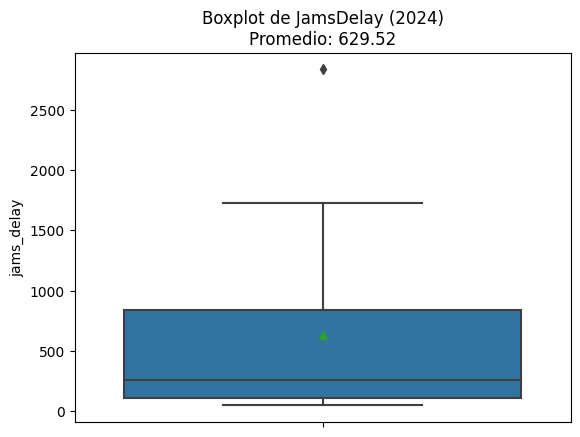

In [ ]:
# Create boxplot to analyze the distribution of average traffic delay (jams_delay) in 2024
sns.boxplot(data=merged, y="jams_delay", showmeans=True)
# Calculate mean value to display in the title
mean_value = merged['jams_delay'].mean()
plt.title(f'Boxplot de JamsDelay (2024)\nMean: {mean_value:.2f}')
plt.show()


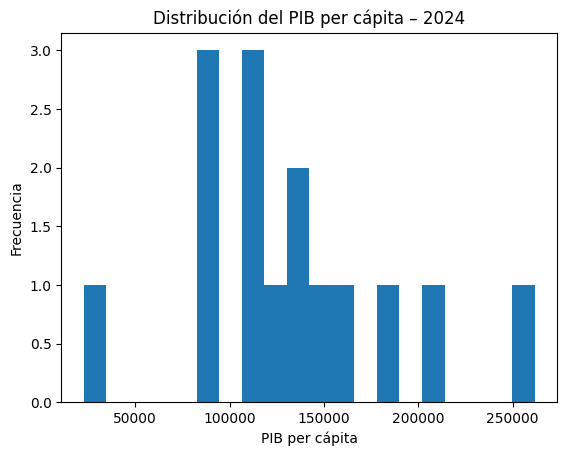

In [ ]:
# Create histogram to analyze the distribution of GDP per capita (2024)
plt.hist(merged["city_gdp_capita"], bins=20)
plt.title("Distribution of GDP per Capita (2024)")
plt.xlabel("GDP per Capita")
plt.ylabel("Frequency")
plt.show()


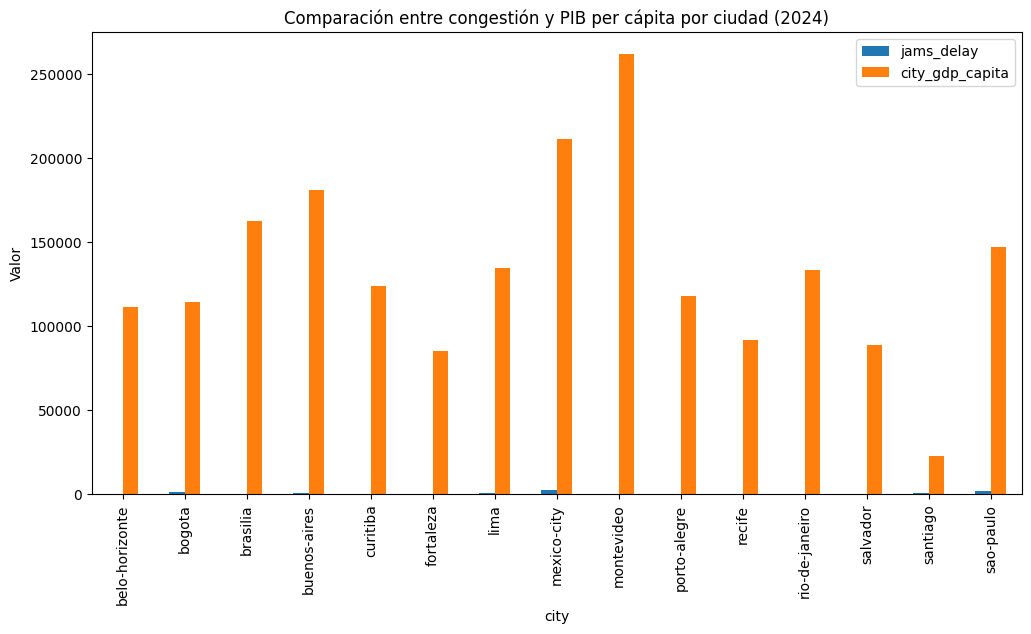

In [ ]:

# Comparative bar chart of traffic delay and GDP per capita by city (2024)

merged.plot(x='city',y=['jams_delay','city_gdp_capita'],
    kind='bar',
    figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Comparison of Traffic Congestion and GDP per Capita by City (2024)')
plt.ylabel('Value')
plt.show()


### Key Insights

- No clear direct relationship is observed between higher GDP per capita and higher urban congestion levels.

- Some high-income cities exhibit moderate congestion levels, suggesting more efficient mobility management and infrastructure planning.

- Other cities combine high GDP per capita with high congestion, indicating that urban size, density, and structural factors likely play a significant role.

- Overall, urban congestion appears to be influenced by multiple variables beyond economic productivity alone.


---

## 7. Exporting and Documenting Results

At this final stage, the cleaned and merged dataset is exported to ensure reproducibility and future analytical use.

### 7.1 Export Final Dataset

The consolidated dataset is saved as a CSV file to preserve the cleaned, structured, and analysis-ready version of the data.

The index is excluded to maintain a clean tabular format.


In [ ]:
# Export final cleaned dataset as CSV
merged.to_csv("ladb_mobility_economy_2024_clean.csv", index=False)


---

## Executive Summary
### Context & Objective

This analysis explores the relationship between urban mobility—measured through traffic congestion and travel time indicators—and economic productivity in major Latin American cities, represented by GDP per capita.  

The primary objective is to assess whether higher levels of congestion are associated with lower economic performance, and to identify cities where mobility constraints may be limiting productivity and long-term growth.

Key mobility indicators include `jams_delay`, `mins_delay`, and travel time metrics, while `city_gdp_capita` serves as the core economic benchmark.

---

### Data Coverage

The analysis focuses on the year 2024 and uses city–country–year aggregated data.

The traffic dataset includes 387 unique city–country combinations, integrating mobility indicators from the TomTom Traffic Index with economic variables from the OECD Cities dataset.

The scope is restricted to Latin American cities to ensure regional comparability and contextual consistency.

---

### Methodology (High-Level)

A structured data cleaning and standardization process was applied to both datasets, including:
- Converting column names to `snake_case`
- Transforming date variables to `datetime`
- Cleaning and converting economic indicators to numeric formats

Because the traffic dataset contains multiple daily records per city, annual averages were computed at the city–country–year level to produce stable and comparable mobility indicators.

The mobility and economic datasets were then merged using an INNER JOIN on `city` and `year`, ensuring that only fully matched observations were included in the final analysis.

Visual validation techniques—including boxplots, histograms, and comparative bar charts—were used to assess distributions, detect outliers, and explore potential relationships between congestion and economic performance.

---

### Key Findings

No consistent linear relationship was observed between higher GDP per capita and lower congestion levels. Economic strength alone does not guarantee efficient urban mobility.

Mexico City emerges as a clear outlier, exhibiting the highest average congestion levels in 2024 while not displaying proportional economic advantage. This suggests significant productivity losses linked to mobility inefficiencies.

Bogotá and Lima also combine elevated congestion with relatively lower economic performance, indicating potential high-impact opportunities for mobility-focused investment.

---

### Strategic Recommendations

Mexico City should be prioritized for transportation infrastructure investment, given its extreme congestion levels and the scale of potential productivity losses.

Bogotá and Lima represent secondary strategic priorities, as improvements in mobility may yield substantial economic and social returns.

Buenos Aires, despite experiencing congestion, shows comparatively stronger productivity indicators, suggesting lower urgency relative to the cities above.

Further analysis is recommended incorporating additional structural variables—such as population size, urban density, and public transport quality—and extending the study across multiple years to assess long-term trends and causal relationships.



